# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [6]:
data.isnull().any().any() # есть пропуски

False

In [5]:
data.fillna("", inplace = True)

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.DataFrame(data=train["target"].value_counts() / len(train.target))
df.rename(columns={"target": "Доля класса"})

,Доля класса
0,0.567461
1,0.432539


In [10]:
top10_list = train["keyword"].value_counts(sort=True).head(10).index.tolist()
prep_data = train[train.apply(lambda x: x.keyword in top10_list, axis=1)][['keyword', 'target']]

In [11]:
graph = prep_data.groupby(['keyword', 'target']).size().reset_index(name='counts')
# groupby(['keyword', 'target']) группируем по всем keyword и для каждого keyword по target
# .size() считает, сколько строк принадлежит каждой группе

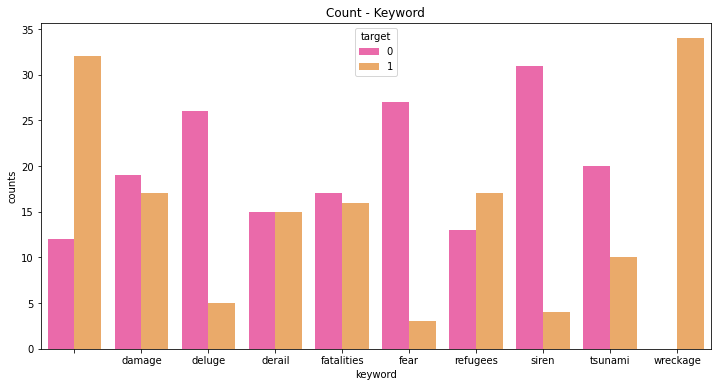

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='keyword', y='counts', data=graph, hue='target', palette='spring', ci=None) 
plt.title('Count - Keyword')
plt.show()

In [13]:
step_dg = prep_data.groupby(['keyword']).mean().reset_index()
# mean считает сумму значение target (это количество элементов, относящихся к классу 1) и делит на количество. 
# Получаем долю класса 1 для каждого keyword

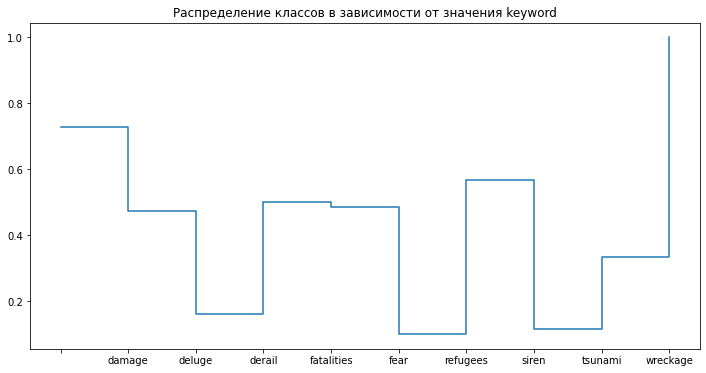

In [86]:
plt.figure(figsize=(12, 6))
plt.step('keyword', 'target', where='post', data=step_dg)
plt.title('Распределение классов в зависимости от значения keyword')
plt.show()

**Вывод:** keywords 'wreckage', 'fear', 'siren', 'deluge' практически однозначно определяют принадлежность к классу

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [15]:
data['mergeStr'] = data.agg(lambda x: f'{x.keyword} {x.location} {x.text}', axis=1)

In [16]:
data.drop(['id', 'keyword', 'location', 'text'], axis=1, inplace=True)

In [17]:
train, test = train_test_split(data, test_size=0.3, random_state=42) # заново разделили на train и test, так как был преобразован изначальный датасет

In [18]:
data.head()

,target,mergeStr
0,1,Our Deeds are the Reason of this #earthquake...
1,1,Forest fire near La Ronge Sask. Canada
2,1,All residents asked to 'shelter in place' ar...
3,1,"13,000 people receive #wildfires evacuation ..."
4,1,Just got sent this photo from Ruby #Alaska a...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train.mergeStr)

In [20]:
X

<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>

Матрица размера 5329x18455 - кол-во предложений (строк в train) на кол-во уникальных слов длины >= 2

In [21]:
pd.DataFrame(X.toarray(), columns=cnt_vec.vocabulary_)

,bridge,20collapse,ashes,2015,australia,ûªs,collapse,at,trent,among,...,monitor,cuffs,gjbainqwn9,jphgpl1c5x,developing,symptoms,rqkk15uhey,stamford,shropshire,easlgea1b7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [46]:
import re

In [47]:
def voc_rubbish(vocab : dict):
    numbers = 0
    punct = 0
    tags = 0
    for key in vocab.keys():
        if re.fullmatch(r'.*\d.*', key):# \d-регулярное выражение, которое соответствует любой цифре
            numbers += 1
        if re.fullmatch(r'.*\W.*', key): # \W Любая не-буква, не-цифра и не подчёркивание
            punct += 1
        if re.fullmatch(r'[#@].+', key):
            tags += 1
    print(f'Количество слов, которые содержат цифры = {numbers}\nКоличество слов, которые содержат символы ' \
          f'пунктуации = {punct}\nКоличество слов с хэштегами и упоминаниями = {tags}')

In [48]:
voc_rubbish(cnt_vec.vocabulary_)

Количество слов, которые содержат цифры = 3812
Количество слов, которые содержат символы пунктуации = 0
Количество слов с хэштегами и упоминаниями = 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [49]:
from nltk.tokenize import TweetTokenizer

tkn_vec = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
X = tkn_vec.fit_transform(train.mergeStr)
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [50]:
pd.DataFrame(X.toarray(), columns=tkn_vec.vocabulary_)

,bridge,%,20collapse,ashes,2015,:,australia,,ûªs,collapse,...,monitor,cuffs,http://t.co/gjbainqwn9,http://t.co/jphgpl1c5x,developing,symptoms,http://t.co/rqkk15uhey,stamford,shropshire,http://t.co/easlgea1b7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
voc_rubbish(tkn_vec.vocabulary_)

Количество слов, которые содержат цифры = 3939
Количество слов, которые содержат символы пунктуации = 7313
Количество слов с хэштегами и упоминаниями = 3147


TweetTokenizer - токенайзер для твитов, он предполагает сохранение знаков препинания, смайлов и других символов, которые влияют на содержание и эмоциональную окраску твита. Поэтому после векторизации с применением данного токенайзера сохранились слова с символами пунктуациии и тэгами.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [52]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [69]:
class CustomTokenizer(object):
    
    def tokenize(self, text: str) -> list:
        """
        Argument: tweet -- any string object.
        Value: a tokenized list of strings; concatenating this list returns the original string if preserve_case=True
        """
        text = text.lower()
        
        tweet_tokenizer = TweetTokenizer()
        tok_text = tweet_tokenizer.tokenize(text)
        res_tok = []
        
        for token in tok_text:
            if (re.fullmatch(r'[#]{,1}[a-z]+', token) or re.fullmatch(r'\W*[)]+\W*', token)):
                if token not in nltk.corpus.stopwords.words('english'):
                    res_tok.append(token)
                
        stemmer = SnowballStemmer('english')
        stemmed_text = [stemmer.stem(w) for w in res_tok]
        
        return stemmed_text

In [70]:
cust_vec = CountVectorizer(tokenizer=CustomTokenizer().tokenize)

In [71]:
X = cust_vec.fit_transform(train.head(10).mergeStr)
pd.DataFrame(X.toarray(), columns=cust_vec.vocabulary_)

,bridg,ash,australia,collaps,trent,among,worst,histori,england,bundl,...,ask,),hous,maracay,nirgua,venezuela,offic,dead,exchang,shot
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
5,0,1,0,0,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [72]:
vec_train = cust_vec.fit_transform(train.mergeStr)
y_train = train.target
vec_test = cust_vec.transform(test.mergeStr)
y_test = test.target

In [73]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(vec_train, y_train)

LogisticRegression()

In [74]:
from sklearn.metrics import f1_score

print(f1_score(y_test, clf.predict(vec_test)))

0.752953813104189


## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

cust_vec = TfidfVectorizer(tokenizer=CustomTokenizer().tokenize)
vec_train = cust_vec.fit_transform(train.mergeStr)
vec_test = cust_vec.transform(test.mergeStr)

clf = LogisticRegression()
clf.fit(vec_train, y_train)

print(f1_score(y_test, clf.predict(vec_test)))

0.7433333333333335


In [78]:
vec_train.shape

(5329, 10476)

Качество уменьшилось (незначиетельно) относительно CountVectorizer

In [76]:
cust_vec = TfidfVectorizer(tokenizer=CustomTokenizer().tokenize, max_df = 0.9)
vec_train = cust_vec.fit_transform(train.mergeStr)
vec_test = cust_vec.transform(test.mergeStr)

clf = LogisticRegression()
clf.fit(vec_train, y_train)

print(f1_score(y_test, clf.predict(vec_test)))

0.7433333333333335


In [79]:
vec_train.shape

(5329, 10476)

Качество и размер матрицы не изменились, значит в выборке не было токенов со значением df больше указанного

In [61]:
cust_vec = TfidfVectorizer(tokenizer=CustomTokenizer().tokenize, min_df = 0.001)
vec_train = cust_vec.fit_transform(train.mergeStr)
vec_test = cust_vec.transform(test.mergeStr)

clf = LogisticRegression()
clf.fit(vec_train, y_train)

print(f1_score(y_test, clf.predict(vec_test)))

0.740983606557377


## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [80]:
from sklearn.feature_extraction.text import HashingVectorizer

cust_vec = HashingVectorizer(tokenizer=CustomTokenizer().tokenize, n_features = 5000)
vec_train = cust_vec.fit_transform(train.mergeStr)
vec_test = cust_vec.transform(test.mergeStr)

clf = LogisticRegression()
clf.fit(vec_train, y_train)

print(f1_score(y_test, clf.predict(vec_test)))


/home/verab/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.7197771587743732


наиболее высокой f1 меры удалось достигнуть при применении CountVectorizer с кастомным токенизатором

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [87]:
vectorizer = CountVectorizer(tokenizer=CustomTokenizer().tokenize)
vec_train = vectorizer.fit_transform(train.mergeStr)
vec_test = vectorizer.transform(test.mergeStr)

clf = LogisticRegression(solver = 'liblinear', max_iter = 300)
clf.fit(vec_train, y_train)

print(f1_score(y_test, clf.predict(vec_test)))

# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
# ‘liblinear’ - [‘l1’, ‘l2’], использует алгоритм координатного спуска

0.7533584094572812
